In [30]:
import streamlit as st
import pandas as pd
import numpy as np
import requests
import time
import json

In [45]:
ns = str(time.time_ns())[:13]
ms = '1528470720000'

ns, len(ns), len(ms)

('1636095205528', 13, 13)

In [82]:
def get_last_8_days_hourly_bitcoin_data():
    """Call Coincap API and request last 8 days of hourly Bitcoin USD data,
    return DataFrame with 'date' and 'price' columns.

    Returns
    -------
    pd.DataFrame
        Dataframe (columns: 'date', 'price' with correct types).
        Price is rounded to 2 decimal places. Last row contains most recent 
        price, first contains price 8 days ago.
    """
    num_seconds_in_8_days = 60 * 60 * 24 * 8
    num_milliseconds_in_8_days = num_seconds_in_8_days * 1000

    now_ns = str(time.time_ns())
    # Take first 13 digits for milliseconds
    # Coincap API only accepts milliseconds
    now_ms = int(now_ns[:13])
    eight_days_ago = now_ms - num_milliseconds_in_8_days

    # Get Bitcoin data for last 8 days
    url = (f"https://api.coincap.io/v2/assets/bitcoin/history?interval=h1"
            f"&start={eight_days_ago}&end={now_ms}")

    payload = {}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)

    json_data = json.loads(response.text.encode("utf8"))
    bitcoin_data = json_data['data']
    
    df = pd.DataFrame(bitcoin_data)
    df = df.loc[:, ['date', 'priceUsd']]
    df.rename(mapper={'priceUsd': 'price'}, inplace=True, axis=1)
    df['date'] = df['date'].apply(pd.to_datetime)
    df['price'] = df['price'].apply(pd.to_numeric)
    df['price'] = df['price'].round(2)
    return df

In [83]:
num_seconds_in_8_days = 60 * 60 * 24 * 8
num_milliseconds_in_8_days = num_seconds_in_8_days * 1000

now_ns = str(time.time_ns())
# Take first 13 digits for milliseconds
# Coincap API only accepts milliseconds
now_ms = int(now_ns[:13])
eight_days_ago = now_ms - num_milliseconds_in_8_days

# Get Bitcoin data for last 8 days
url = (f"https://api.coincap.io/v2/assets/bitcoin/history?interval=h1"
        f"&start={eight_days_ago}&end={now_ms}")

payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)
pd.DataFrame(response.json()['data'])

priceUsd           time          circulatingSupply  \
0    60593.3393898699611987  1635411600000  18856618.0000000000000000   
1    61027.7922815506216029  1635415200000  18856681.0000000000000000   
2    61048.5667226751748454  1635418800000  18856681.0000000000000000   
3    60993.0928749382902512  1635422400000  18856781.0000000000000000   
4    61135.7078704091089916  1635426000000  18856781.0000000000000000   
..                      ...            ...                        ...   
187  62307.8054568924045434  1636084800000  18864112.0000000000000000   
188  62187.6101454638151687  1636088400000  18864181.0000000000000000   
189  62271.5217865396891294  1636092000000  18864181.0000000000000000   
190  62305.0377666721078014  1636095600000  18864268.0000000000000000   
191  62249.8923445232124076  1636099200000  18864268.0000000000000000   

                         date  
0    2021-10-28T09:00:00.000Z  
1    2021-10-28T10:00:00.000Z  
2    2021-10-28T11:00:00.000Z  
3    2021-10-28T12:00:00.000Z  
4    2021-10-28T13:00:00.000Z  
..                        ...  
187  2021-11-05T04:00:00.000Z  
188  2021-11-05T05:00:00.000Z  
189  2021-11-05T06:00:00.000Z  
190  2021-11-05T07:00:00.000Z  
191  2021-11-05T08:00:00.000Z  

[192 rows x 4 columns]

<AxesSubplot:xlabel='date'>

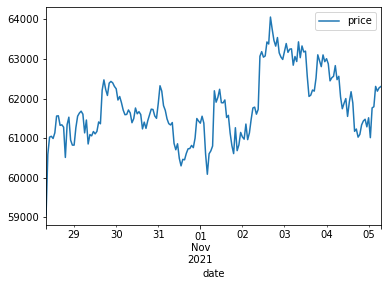

In [72]:
df.plot(x='date', y='price')

In [54]:
pd.DataFrame(json_data['data'])

priceUsd           time          circulatingSupply  \
0    59140.5605515122468073  1635404400000  18856537.0000000000000000   
1    59068.2592819495710441  1635408000000  18856618.0000000000000000   
2    60593.3393898699611987  1635411600000  18856618.0000000000000000   
3    61027.7922815506216029  1635415200000  18856681.0000000000000000   
4    61048.5667226751748454  1635418800000  18856681.0000000000000000   
..                      ...            ...                        ...   
187  61765.5955091704797180  1636077600000  18864025.0000000000000000   
188  61794.4897326117395223  1636081200000  18864112.0000000000000000   
189  62307.8054568924045434  1636084800000  18864112.0000000000000000   
190  62187.6101454638151687  1636088400000  18864181.0000000000000000   
191  62271.5217865396891294  1636092000000  18864181.0000000000000000   

                         date  
0    2021-10-28T07:00:00.000Z  
1    2021-10-28T08:00:00.000Z  
2    2021-10-28T09:00:00.000Z  
3    2021-10-28T10:00:00.000Z  
4    2021-10-28T11:00:00.000Z  
..                        ...  
187  2021-11-05T02:00:00.000Z  
188  2021-11-05T03:00:00.000Z  
189  2021-11-05T04:00:00.000Z  
190  2021-11-05T05:00:00.000Z  
191  2021-11-05T06:00:00.000Z  

[192 rows x 4 columns]

In [19]:
import time
time.time()

1636094309.928011

In [20]:
num_seconds_in_8_days = 60 * 60 * 24 * 8

In [21]:
time.time() - num_seconds_in_8_days

1635403189.315574

In [28]:
now = time.time()
past = time.localtime(now - num_seconds_in_8_days)

print(time.localtime(now))
print(past)

time.struct_time(tm_year=2021, tm_mon=11, tm_mday=5, tm_hour=14, tm_min=44, tm_sec=21, tm_wday=4, tm_yday=309, tm_isdst=0)
time.struct_time(tm_year=2021, tm_mon=10, tm_mday=28, tm_hour=14, tm_min=44, tm_sec=21, tm_wday=3, tm_yday=301, tm_isdst=0)


In [29]:
time.time_ns()

1636094710884485000